<a href="https://colab.research.google.com/github/MethEthPro/colab/blob/main/100DL/simple_regression_using_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!kaggle datasets download -d mohansacharya/graduate-admissions


Dataset URL: https://www.kaggle.com/datasets/mohansacharya/graduate-admissions
License(s): CC0-1.0
  0% 0.00/9.64k [00:00<?, ?B/s]
100% 9.64k/9.64k [00:00<00:00, 14.9MB/s]


In [2]:
!unzip graduate-admissions.zip


Archive:  graduate-admissions.zip
  inflating: Admission_Predict.csv   
  inflating: Admission_Predict_Ver1.1.csv  


In [5]:
import pandas as pd

In [29]:
df = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [30]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [31]:
df.shape

(500, 9)

it is a regression problem , we would
like to make a NN on it

In [32]:
df.info()
# this tells us no value is empty

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [33]:
df.duplicated().sum()
# we drop duplicate rows

0

In [34]:
df.shape

(500, 9)

In [35]:
df.drop(columns=['Serial No.'], inplace = True)
# we get rid of the extra serial number column

In [36]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [37]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [66]:
X.shape

(500, 7)

In [38]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [40]:
y.head()

,Chance of Admit
0,0.92
1,0.76
2,0.72
3,0.80
4,0.65


In [41]:
# now since we know the strict upper and lower bound limits
# we can use min max scaling
# but before that lets do min max scaling

In [42]:
from sklearn.model_selection import train_test_split

In [97]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [98]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [99]:
X_train

array([[0.4       , 0.42857143, 0.5       , ..., 0.57142857, 0.50320513,
        0.        ],
       [0.56      , 0.64285714, 0.        , ..., 0.57142857, 0.55769231,
        1.        ],
       [0.2       , 0.32142857, 0.5       , ..., 0.28571429, 0.34615385,
        0.        ],
       ...,
       [0.7       , 0.53571429, 0.5       , ..., 0.57142857, 0.74038462,
        1.        ],
       [0.72      , 0.67857143, 1.        , ..., 0.71428571, 0.77884615,
        1.        ],
       [0.2       , 0.46428571, 0.        , ..., 0.14285714, 0.32051282,
        0.        ]])

In [100]:
import torch
from torch import nn

In [101]:
import numpy as np

In [102]:
y_train = np.array(y_train)

In [103]:
y_test = np.array(y_test)

In [104]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test,dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)

In [164]:
class ModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Linear(in_features=7,out_features=7),
        nn.ReLU(),
        nn.Linear(in_features=7,out_features=7),
        nn.ReLU(),
        nn.Linear(in_features=7,out_features=1)
    )
  def forward(self,x):
    return self.layer_stack(x)

In [165]:
mymodel = ModelV0()
mymodel.float()

ModelV0(
  (layer_stack): Sequential(
    (0): Linear(in_features=7, out_features=7, bias=True)
    (1): ReLU()
    (2): Linear(in_features=7, out_features=7, bias=True)
    (3): ReLU()
    (4): Linear(in_features=7, out_features=1, bias=True)
  )
)

In [166]:
mymodel.state_dict()

OrderedDict([('layer_stack.0.weight',
              tensor([[ 0.2416,  0.3248, -0.0374, -0.0846,  0.0055, -0.0226,  0.0909],
                      [ 0.1059, -0.3433, -0.1395,  0.3183,  0.1472, -0.0188, -0.2279],
                      [-0.2312, -0.3386, -0.1232,  0.1276,  0.2410,  0.1745, -0.3341],
                      [-0.2273, -0.0596,  0.3656,  0.0547, -0.0979,  0.1564, -0.1440],
                      [-0.2446,  0.2759, -0.1719, -0.0758, -0.3760,  0.2530,  0.2864],
                      [ 0.1377, -0.2635, -0.3730, -0.3070,  0.2818,  0.1815,  0.3181],
                      [ 0.1980,  0.0957, -0.0037, -0.2874, -0.3238, -0.3535,  0.1547]])),
             ('layer_stack.0.bias',
              tensor([-0.1856, -0.0761, -0.2175, -0.0689, -0.2660, -0.2470,  0.1254])),
             ('layer_stack.2.weight',
              tensor([[-0.1123,  0.2333, -0.1213, -0.2773, -0.0667, -0.1832, -0.1156],
                      [-0.3598,  0.2115, -0.2631,  0.1900,  0.1715,  0.2700, -0.2899],
              

In [167]:
loss_fnc = nn.MSELoss()
optimizer = torch.optim.Adam(params=mymodel.parameters(),lr=0.1)

In [168]:
y_pred = mymodel(X_train)

y_pred.shape

torch.Size([400, 1])

In [169]:
y_pred = y_pred.squeeze(1)
y_pred.shape

torch.Size([400])

In [170]:
y_train.shape

torch.Size([400])

In [171]:

epochs = 100

train_loss_his=[]
test_loss_his=[]

for epoch in range(epochs):

  mymodel.train()

  y_pred = mymodel(X_train)

  y_pred = y_pred.squeeze(1)

  loss = loss_fnc(y_pred,y_train)

  train_loss_his.append(loss.item())

  # setting all the gradients to zero
  # to avoid gradient accumulation
  optimizer.zero_grad()

  # backprop
  loss.backward()


  # updating the weight and biases by a step value
  optimizer.step()

  mymodel.eval()

  with torch.inference_mode():

    y_pred = mymodel(X_test)

    y_pred = y_pred.squeeze(1)

    test_loss = loss_fnc(y_pred,y_test)

    test_loss_his.append(test_loss.item())
  if(epoch%10==0):
    print(f"epoch {epoch}   training loss {loss.item()}   test loss {test_loss.item()}")



epoch 0   training loss 0.3180658221244812   test loss 0.09740819782018661
epoch 10   training loss 0.017756519839167595   test loss 0.022691410034894943
epoch 20   training loss 0.02014031819999218   test loss 0.020526817068457603
epoch 30   training loss 0.01727762445807457   test loss 0.016452006995677948
epoch 40   training loss 0.01001393049955368   test loss 0.008471343666315079
epoch 50   training loss 0.005129016470164061   test loss 0.004266931209713221
epoch 60   training loss 0.005079805850982666   test loss 0.004151167813688517
epoch 70   training loss 0.004211960360407829   test loss 0.003835357492789626
epoch 80   training loss 0.004019654355943203   test loss 0.0036729678977280855
epoch 90   training loss 0.0038256454281508923   test loss 0.003573725000023842


In [172]:
mymodel.eval()
with torch.inference_mode():
  y_pred = mymodel(X_test)

In [173]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8155395862688677

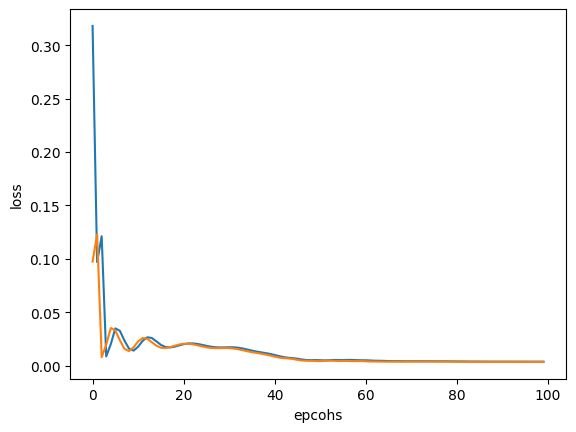

In [176]:
import matplotlib.pyplot as plt

plt.ylabel("loss")
plt.xlabel("epcohs")


plt.plot(train_loss_his)
plt.plot(test_loss_his)
# plotting the loss
